In [1]:
import numpy as np
import tensorflow as tf
from random import shuffle
import cv2
import os

In [2]:
TRAIN_DIR = "C:/Users/Chenge/Documents/python/all/train/train"
TEST_DIR = "C:/Users/Chenge/Documents/python/all/test1/test1"
TEST_DIR2 = "C:/Users/Chenge/Documents/python/all/test1/test"

img_shape = 64 #Tamaño de imagen


In [3]:
def classificaction(img):
    if 'cat' in img:
        category = np.array([1,0])
    elif 'dog' in img:
        category = np.array([0,1])
    return category

def train_images_class():
    train_images = []
    
    for file in os.listdir(TRAIN_DIR):
        path = os.path.join(TRAIN_DIR,file)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_shape,img_shape))
        
        train_images.append([np.array(img), classificaction(file)])
    shuffle(train_images)
    
    return train_images


def validation_split(t):
    shuffle(t)
    total = len(t)
    valor = total * 0.20
    validation_split = t[-int(valor):]
    v = len(validation_split)
    while v !=0:
        t.pop(total-1)
        total = total-1
        v = v-1
    return t, validation_split

In [4]:
train_images = train_images_class()

In [6]:
img_array = img_shape * img_shape

In [7]:
#Párameters

learning_rate = 0.001
num_classes = 2
num_inputs = img_array
dropout = 0.2
batch_size = 64

x = tf.placeholder(tf.float32, shape=[None,num_inputs]) #(None,4096)
y = tf.placeholder(tf.float32, shape=[None,num_classes]) #None, 2 Dog or Cat
keep_prob = tf.placeholder(tf.float32)

In [8]:
def conv2d(x,weight,bias,strides = 1):
    x = tf.nn.conv2d(x,weight,strides=[1,strides,strides,1],padding="SAME") 
    #X Input, Weight= filter,#strides of sliding window padding = The type of padding algorithm to use
    x = tf.nn.bias_add(x,bias)
    return tf.nn.relu(x)

def maxpool2d(x,k = 2,stride=2):
    return tf.nn.max_pool(x,ksize=[1,k,k,1], strides = [1,stride,stride,1], padding="SAME")


In [9]:
def convolutional_net(x,weight,biases,dropout):
    x = tf.reshape(x,shape=[-1,64,64,1])
    
    conv1 = conv2d(x,weight['conv1'],biases['b1'])
    conv1 = maxpool2d(conv1,k=2)
    
    
    conv2 = conv2d(conv1,weight['conv2'],biases['b2'])
    conv2 = maxpool2d(conv2, k=2)
    
    
    #Fully conection
    fc1 = tf.reshape(conv2, [-1, weights['fc1'].get_shape().as_list()[0]])
    #print(fc1.shape)#This value must be the same or a multiple of fc1 
    #fc1 = tf.add(tf.matmul(fc1,weights['fc1']),biases['bc1'])
    #fc1  = tf.nn.relu(fc1)
    #fc1 = tf.nn.dropout(fc1,dropout)
    
    dense1 = tf.layers.dense(inputs=fc1, units=512, activation=tf.nn.relu)
    dropout_layer1 = tf.layers.dropout(inputs=dense1, rate=dropout)
    dense2 = tf.layers.dense(inputs=dropout_layer1, units=128, activation=tf.nn.relu)
    dropout_layer2 = tf.layers.dropout(inputs=dense2, rate=dropout)
    dense3 = tf.layers.dense(inputs=dropout_layer2, units=2)
    
    
    #out = tf.add(tf.matmul(dropout_layer2, weights['out']), biases['out'])
    return dense3

In [10]:
weights = {
    'conv1': tf.Variable(tf.random_normal([5, 5, 1,30])),
    'conv2': tf.Variable(tf.random_normal([5, 5, 30,64])),
    'fc1': tf.Variable(tf.random_normal([16*16*64, 512])),
    'out': tf.Variable(tf.random_normal([64, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([30])),
    'b2': tf.Variable(tf.random_normal([64])),
    'bc1': tf.Variable(tf.random_normal([512])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [11]:
pred = convolutional_net(x,weights,biases,dropout)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [12]:
# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1)) #Get max argument in both values and check if it is the same
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) #Change type to float32

In [15]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    epochs = 25 
    train_size = 20000

    batch_inicial = 0
    i = 0
    
    
    img_data = np.array([i[0] for i in train_images2])
    img_data = np.array([i[0] for i in train_images2]).reshape(len(img_data),img_array)/255
    img_label = np.array([i[1] for i in train_images2])
    
    img_data2 = np.array([i[0] for i in val_split])
    img_data2 = np.array([i[0] for i in val_split]).reshape(len(img_data2),img_array)/255
    img_label2 = np.array([i[1] for i in val_split])
    
    while i < epochs:
        step = 1
        batch_performed = step * batch_size
        shuffle(train_images2)

        shuffle(val_split)
        
        batch_x2 = img_data2[:100]
        batch_y2 = img_label2[:100]
        
        # Keep training until reach max iterations
        while batch_performed < train_size:
            
            if batch_performed + batch_size < train_size:

                batch_inicial = (step-1) * batch_size
                batch_performed = step * batch_size
                
                batch_x = img_data[batch_inicial:batch_performed]
                batch_y = img_label[batch_inicial:batch_performed]
                

                # Run optimization op (backprop)
                sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

            else:
                break
                
            step += 1
                

        batch_x = img_data[-batch_size:]
        batch_y = img_label[-batch_size:]
                
        loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,y: batch_y,keep_prob: 1.})
        print("Iter 20000, Minibatch Loss= " + \
                "{:.6f}".format(loss) + ", Training Accuracy= " + \
                "{:.5f}".format(acc))

        acc2 = sess.run(accuracy, feed_dict={x: batch_x2,y: batch_y2,keep_prob: 1.})
        print("Validating Training Accuracy= " + "{:.5f}".format(acc2))
        saver.save(sess, "./model2.ckpt")
        
        i = i +1

        print("Fin del epoch "+ str(i))
            

            

    print("Optimization Finished!")

Iter 20000, Minibatch Loss= 206.806335, Training Accuracy= 0.45312
Validating Training Accuracy= 0.49000
Fin del epoch 1
Iter 20000, Minibatch Loss= 1.178942, Training Accuracy= 0.59375
Validating Training Accuracy= 0.53000
Fin del epoch 2
Iter 20000, Minibatch Loss= 0.831731, Training Accuracy= 0.68750
Validating Training Accuracy= 0.62000
Fin del epoch 3
Iter 20000, Minibatch Loss= 0.821344, Training Accuracy= 0.60938
Validating Training Accuracy= 0.53000
Fin del epoch 4
Iter 20000, Minibatch Loss= 0.427333, Training Accuracy= 0.79688
Validating Training Accuracy= 0.68000
Fin del epoch 5
Iter 20000, Minibatch Loss= 3.125961, Training Accuracy= 0.56250
Validating Training Accuracy= 0.51000
Fin del epoch 6
Iter 20000, Minibatch Loss= 0.465133, Training Accuracy= 0.78125
Validating Training Accuracy= 0.59000
Fin del epoch 7
Iter 20000, Minibatch Loss= 0.748876, Training Accuracy= 0.62500
Validating Training Accuracy= 0.58000
Fin del epoch 8
Iter 20000, Minibatch Loss= 0.532542, Training

In [16]:
init = tf.global_variables_initializer()
new_saver = tf.train.import_meta_graph('./model2.ckpt.meta')
shuffle(test_images)
with tf.Session() as sess:
    sess.run(init)
    new_saver.restore(sess, './model2.ckpt')
    shuffle(val_split)
    img_data = np.array([i[0] for i in val_split])
    img_data = np.array([i[0] for i in val_split]).reshape(len(img_data),img_array)/255
    img_label = np.array([i[1] for i in val_split])
    
    batch_x = img_data[:10]
    batch_y = img_label[:10]
    
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: batch_x,
                                      y: batch_y,
                                      keep_prob: 1.}))

INFO:tensorflow:Restoring parameters from ./model2.ckpt
Testing Accuracy: 0.7


In [21]:
from random import randint
test_images = []
for i in os.listdir(TEST_DIR):
    test_images.append(i)

num = randint(0, len(test_images)-1)
path = os.path.join(TEST_DIR, test_images[num])
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64,64))
test_image = np.array(img)

print(test_image.shape)
test_image= test_image.reshape(1,img_array)/255
print(test_image.shape)

(64, 64)
(1, 4096)


In [22]:
init = tf.global_variables_initializer()
new_saver = tf.train.import_meta_graph('./model2.ckpt.meta')
with tf.Session() as sess:
    sess.run(init)
    new_saver.restore(sess, './model2.ckpt')
    classification = sess.run(pred, feed_dict={x:test_image})
    print(classification)

INFO:tensorflow:Restoring parameters from ./model2.ckpt
[[-4.78700066  5.79055071]]


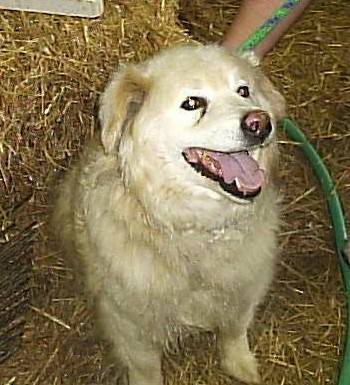

In [23]:
from IPython.display import Image
Image(filename=path)

In [24]:
if np.argmax(classification) == 1:
    print("Dog")
else:
    print("Cat")

Dog
